In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import sklearn
sklearn.__version__

'0.24.1'

In [3]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
olympic = pd.read_csv("https://raw.githubusercontent.com/sdrogers/fcmlcode/master/R/data/olympics/male100.csv", names = ["year","time"])

In [5]:
olympic

,year,time
0,1896,12.00
1,1900,11.00
2,1904,11.00
3,1906,11.20
4,1908,10.80
5,1912,10.80
6,1920,10.80
7,1924,10.60
8,1928,10.80
9,1932,10.30


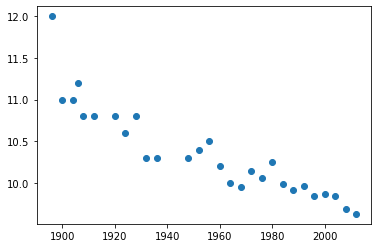

In [6]:
plt.scatter('year', 'time', data = olympic)
plt.show()

In [7]:
y = olympic.time
y.shape

(28,)

In [8]:
# creates an instance of a linear regression model where we will estimate the intercept
model = linear_model.LinearRegression(fit_intercept = True)

In [9]:
# SciKit Learn requires that the features (x) be a matrix
# and the response y be a one-dimension array

In [10]:
# we create an X matrix using the x values
x = olympic.year.values
X = x.reshape([-1,1])
print(X.shape)

(28, 1)


In [11]:
# now we fit the model to the data
model.fit(X, y)

LinearRegression()

In [12]:
print(model.coef_)

[-0.01327532]


In [13]:
print(model.intercept_)

36.30912040967222


In [14]:
prediction_x  = np.linspace(1900, 2000, 101)
prediction_x.shape

(101,)

In [15]:
prediction_x = prediction_x.reshape([-1,1])

In [16]:
model.predict(prediction_x)

array([11.08600515, 11.07272982, 11.0594545 , 11.04617918, 11.03290385,
       11.01962853, 11.00635321, 10.99307788, 10.97980256, 10.96652723,
       10.95325191, 10.93997659, 10.92670126, 10.91342594, 10.90015061,
       10.88687529, 10.87359997, 10.86032464, 10.84704932, 10.833774  ,
       10.82049867, 10.80722335, 10.79394802, 10.7806727 , 10.76739738,
       10.75412205, 10.74084673, 10.72757141, 10.71429608, 10.70102076,
       10.68774543, 10.67447011, 10.66119479, 10.64791946, 10.63464414,
       10.62136881, 10.60809349, 10.59481817, 10.58154284, 10.56826752,
       10.5549922 , 10.54171687, 10.52844155, 10.51516622, 10.5018909 ,
       10.48861558, 10.47534025, 10.46206493, 10.4487896 , 10.43551428,
       10.42223896, 10.40896363, 10.39568831, 10.38241299, 10.36913766,
       10.35586234, 10.34258701, 10.32931169, 10.31603637, 10.30276104,
       10.28948572, 10.2762104 , 10.26293507, 10.24965975, 10.23638442,
       10.2231091 , 10.20983378, 10.19655845, 10.18328313, 10.17

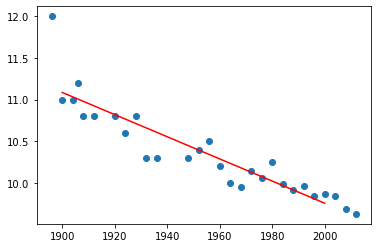

In [17]:
plt.scatter(x, y)
plt.plot(prediction_x, model.predict(prediction_x), color = 'red')
plt.show()

In [18]:
residuals = y - model.predict(X)

In [19]:
print(residuals)

0     0.860894
1    -0.086005
2    -0.032904
3     0.193647
4    -0.179803
5    -0.126701
6    -0.020499
7    -0.167397
8     0.085704
9    -0.361195
10   -0.308093
11   -0.148790
12    0.004312
13    0.157413
14   -0.089486
15   -0.236384
16   -0.233283
17    0.009818
18   -0.017081
19    0.226021
20    0.019122
21    0.002223
22    0.095325
23    0.028426
24    0.111527
25    0.144629
26    0.037730
27    0.030831
Name: time, dtype: float64


In [20]:
np.mean(residuals)

1.9032394707859825e-16

(array([2., 6., 7., 8., 4., 0., 0., 0., 0., 1.]),
 array([-0.36119479, -0.23898595, -0.11677712,  0.00543172,  0.12764055,
         0.24984939,  0.37205822,  0.49426705,  0.61647589,  0.73868472,
         0.86089356]),
 <BarContainer object of 10 artists>)

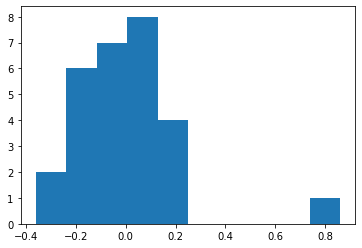

In [21]:
plt.hist(residuals)

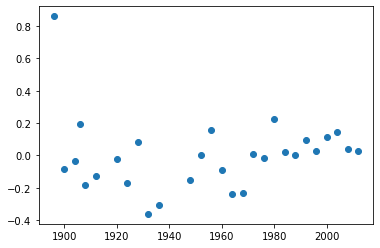

In [22]:
plt.plot(x, residuals, "o")

# Boston Housing Data set

In [23]:
from sklearn.datasets import load_boston
boston = load_boston()

In [24]:
type(boston)

sklearn.utils.Bunch

In [25]:
boston.keys()  # boston is a dictionary, the x variables are in 'data' and the y values are in 'target'

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [26]:
boston.data.shape  # the x matrix, 506 rows 13 columns

(506, 13)

In [27]:
boston.target.shape # the one-dimensional target y values

(506,)

In [28]:
print(boston.feature_names)  # the names of the x variables

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [29]:
print(boston.DESCR)  # data dictionary

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [30]:
boston.filename

'C:\\Users\\miles\\anaconda3\\lib\\site-packages\\sklearn\\datasets\\data\\boston_house_prices.csv'

In [31]:
type(boston.data)

numpy.ndarray

In [32]:
# we will convert to pandas dataframe
bos = pd.DataFrame(boston.data)
print(bos.head())

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


In [33]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [34]:
boston.target[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [35]:
# we will add the array of values to the bos dataframe
bos['PRICE'] = boston.target

In [36]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [37]:
bosmodel = linear_model.LinearRegression()

In [38]:
X = bos.loc[:, 'CRIM':'LSTAT']
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [39]:
type(bos.loc[:,'PRICE'])

pandas.core.series.Series

In [40]:
bosmodel.fit(X, boston.target)

LinearRegression()

In [41]:
bosmodel.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [42]:
yhat = bosmodel.predict(X)

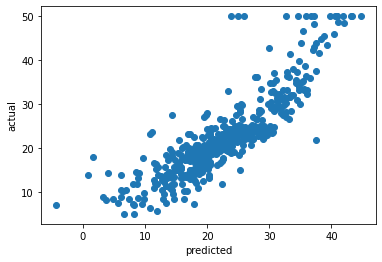

In [43]:
plt.plot(yhat, boston.target, 'o')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

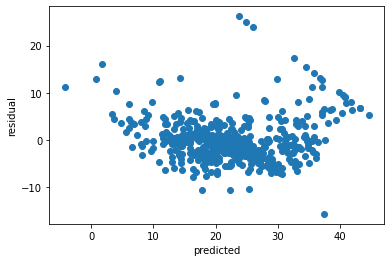

In [44]:
residuals = boston.target - yhat
plt.plot(yhat, residuals, 'o')
plt.xlabel('predicted')
plt.ylabel('residual')
plt.show()

In [45]:
bosmodel.score(X, boston.target)

0.7406426641094095